# Pymaceuticals Inc.
---

### Analysis

    Our comprehensive data analysis of the effects of different types of drug regimens on tumor growth in mice has produced significant results on the potential effectiveness of these various treatments. Analyzing different data points such as tumor volume changes, calculating summary statistics, identifying outliers in data, and performing statistical tests, allowed us to compare the effectiveness of the drug regimens studied. 
    
    Our focus was on four specific treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. The findings indicate that Capomulin and Ramicane outperform Infubinol and Ceftamin in terms of tumor volume reduction. This conclusion is supported by studying the lower values of mean tumor volume, variances, and the lack of outliers in the distributions of tumor volumes for mice treated with these four treatment regimens. Specifically, Capomulin and Ramicane have a mean tumor volume value of 40.675741 and 40.216745 respectively which stand in contrast to the 52.884795 and 52.591172 observed for Infubinol and Ceftamin. Furthermore, our analysis revealed a notable positive correlation between mouse weight and tumor volume in the Capomulin-treated group, suggesting that mouse weight may play a role in treatment efficacy.

    Given the comprehensive data analysis, Capomulin and Ramicane are great drug regimens to target reducing tumor growth in mice which their potential as promising candidates for further investigation in the pursuit of cancer treatment solutions.

In [43]:
%matplotlib inline

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress, pearsonr

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [45]:
# Checking the number of mice.
mice_count = df["Mouse ID"].nunique()
mice_count

249

In [46]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_rows = df[df.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_mouse_ids = duplicate_rows["Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [47]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = df[df["Mouse ID"].isin(duplicate_mouse_ids)]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [48]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df[~df["Mouse ID"].isin(duplicate_mouse_ids)]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [49]:
# Checking the number of mice in the clean DataFrame.
mice_count = clean_df["Mouse ID"].nunique()
mice_count

248

## Summary Statistics

In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_df = clean_df.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = grouped_df['Tumor Volume (mm3)'].mean()
median = grouped_df['Tumor Volume (mm3)'].median()
variance = grouped_df['Tumor Volume (mm3)'].var()
std_dev = grouped_df['Tumor Volume (mm3)'].std()
sem = grouped_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev.": std_dev,
    "Tumor Volume Std. Err.": sem
})

# Print
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [51]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

# Print
summary_stats_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

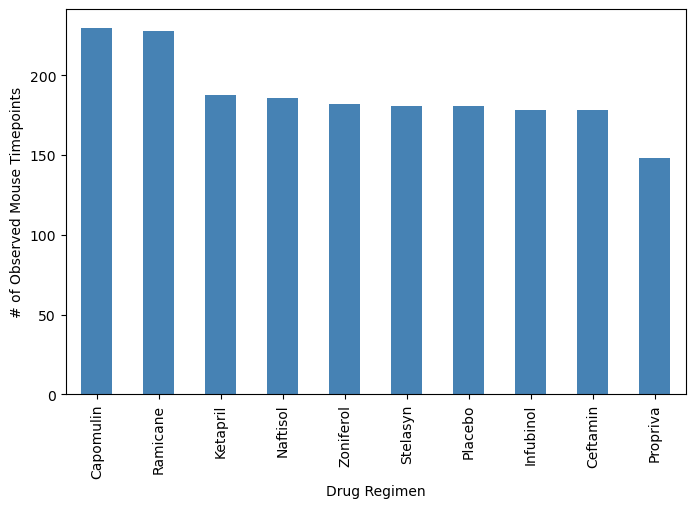

In [52]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
measurements = clean_df["Drug Regimen"].value_counts()
measurements.plot(kind='bar', figsize=(8,5), color="steelblue", alpha=1)

# Labeling the Bar Plot
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Print
plt.show()

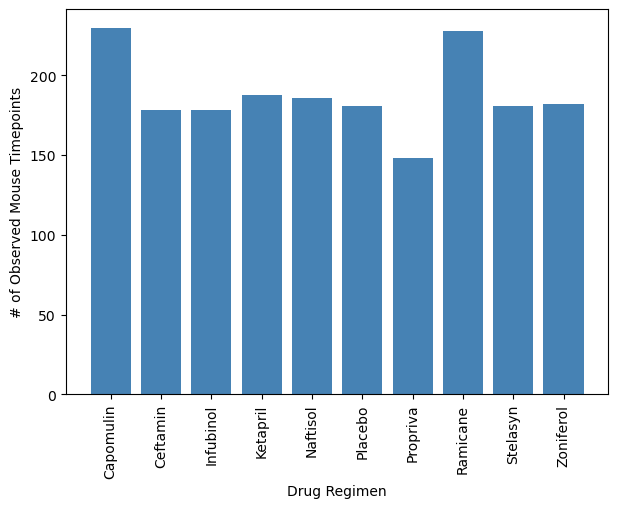

In [53]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Counting the measurement for each drug regimen and getting their corresponding positions
measurement = clean_df["Drug Regimen"].value_counts()
measurement_counts = measurement.sort_index()

# Generating x labels (drug regimen)
x_labels = measurement_counts.index
x_positions = range(len(x_labels))

# Plot!
plt.figure(figsize=(7,5))
plt.bar(x_positions, measurement_counts, alpha=1, color="steelblue")

# Add x-ticks labels based on each drug regimen
plt.xticks(x_positions, x_labels, rotation=90)

# Adding titles to the axis'
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Print!
plt.show()

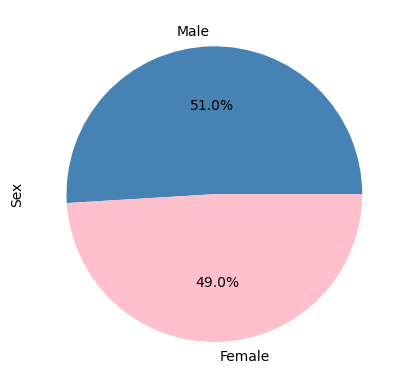

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Counting how many times the gender of the mice occurs in the data
gender_distribution = clean_df["Sex"].value_counts()

# Generating the pie plot
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=360, colors=["steelblue", "pink"])

# Labeling the y axis
plt.ylabel("Sex")

# Print!
plt.show()

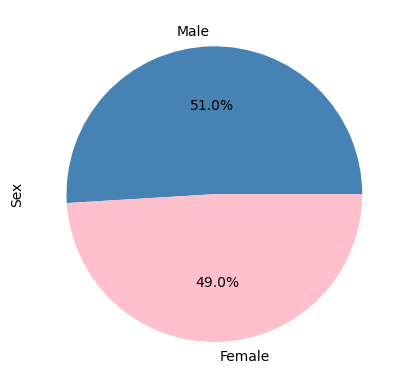

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Counting how many times the gender of the mice occurs in the data
gender_distribution = clean_df["Sex"].value_counts()

# Extracting labels and sizes for the pie chart
labels = gender_distribution.index
sizes = gender_distribution.values

# Defining the colors on the piechart
colors = ["steelblue", "pink"]

# Labeling the y axis
plt.ylabel("Sex")

# Generating the pie plot
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=360)

# Print!
plt.show()

## Quartiles, Outliers and Boxplots

In [56]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Filtering DF for four of the treatment regiments
treatments_filter = clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
treatments_df = clean_df[treatments_filter]

# Start by getting the last (greatest) timepoint for each mouse
timepoint = treatments_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_DF = pd.merge(timepoint, clean_df, on=["Mouse ID", "Timepoint"], how="left")

# Print
tumor_volume_DF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [57]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

for treatment in treatment_list: 
    # Locate the rows that contain mice on each drug and get the tumor volumes
    treatment_data = tumor_volume_DF[tumor_volume_DF["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]

    # add subset 
    tumor_vol_list.append(treatment_data)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = treatment_data.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Determine outliers using upper and lower bounds
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]

    # Print
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


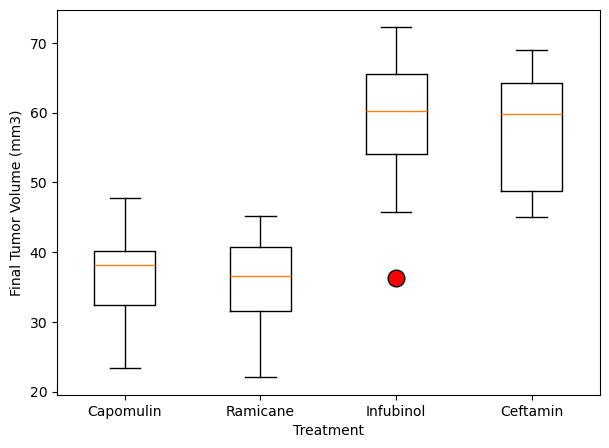

In [58]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

flierprops = dict(marker="o", markerfacecolor="red", markersize=12)
plt.figure(figsize=(7,5))
plt.boxplot(tumor_vol_list, labels=treatment_list, flierprops=flierprops)
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Treatment")

plt.show()

## Line and Scatter Plots

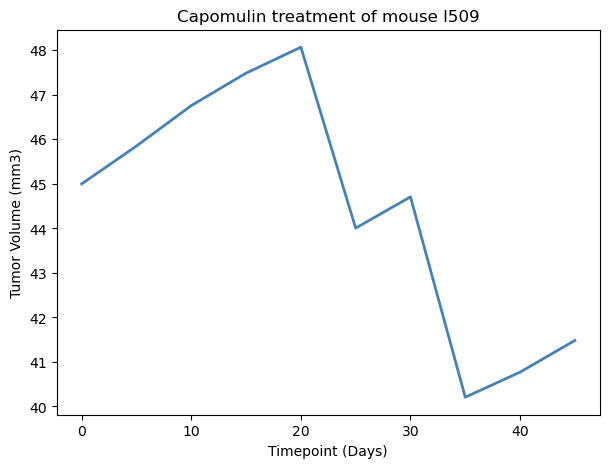

In [59]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filtering DF for mice using Capomulin treatments
capomulin_df = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

# Selecting Mouse l509
mouse_id = "l509"
mouse_data = capomulin_df[capomulin_df["Mouse ID"] == mouse_id]

# Plotting data
plt.figure(figsize=(7,5))
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], color="steelblue", linestyle="-", linewidth=2, markersize=6)

# Labeling 
plt.title(f"Capomulin treatment of mouse {mouse_id}")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Print
plt.show()

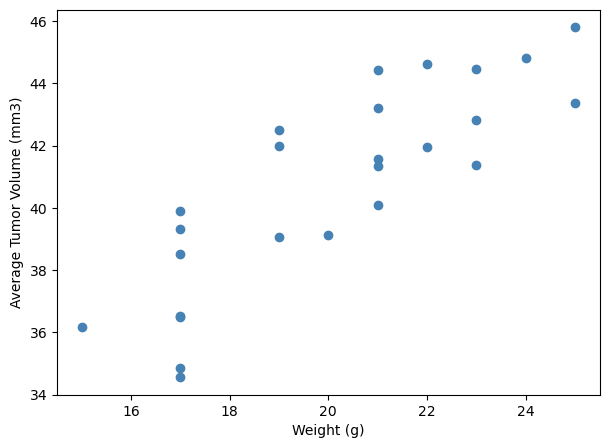

In [60]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filtering DF for mice using Capomulin treatments
capomulin_df = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

# Calculating average tumor volume for each mouse
average_tumor_volume = capomulin_df.groupby("Mouse ID").agg({"Tumor Volume (mm3)":"mean"}).reset_index()

# Calculating weight of each mouse
mouse_weight = capomulin_df[["Mouse ID", "Weight (g)"]].drop_duplicates()

# Merging average tumor volume and weight dataframes
avg_tumor_vol_and_weight = pd.merge(average_tumor_volume, mouse_weight, on="Mouse ID")

# Making the scatter plot
plt.figure(figsize=(7,5))
plt.scatter(avg_tumor_vol_and_weight["Weight (g)"], avg_tumor_vol_and_weight["Tumor Volume (mm3)"], color="steelblue")

# Labeling
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Print
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is: 0.84


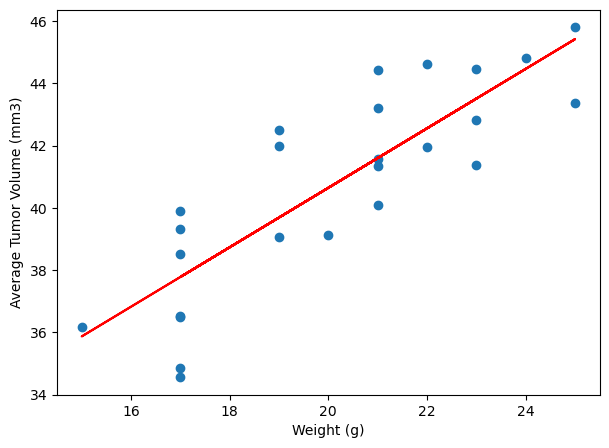

In [61]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Grabbing data from average tumor volum and weight df
x_values = avg_tumor_vol_and_weight["Weight (g)"]
y_values = avg_tumor_vol_and_weight["Tumor Volume (mm3)"]

# Calculating the correlation coefficient
correlation_coefficient = pearsonr(x_values, y_values)[0]
print(f"The correlation coefficient between mouse weight and average tumor volume is: {correlation_coefficient:.2f}")

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Creating an equation of line to calculate predicted tumor volume
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the linear model on top of the scatter plot 
plt.figure(figsize=(7,5))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")

# Labeling the plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Print
plt.show()